# Sprawozdanie z Generowania reguł asocjacyjnych

Danologia, Laboratoria

## Zad 1

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# 1. Wczytanie i filtrowanie danych
with open('input_file_0.csv', 'r') as f:
    transactions = [line.strip().split(',') for line in f]

unwanted_items = {'low', 'high'}
filtered_transactions = []
for transaction in transactions:
    filtered_transaction = [
        item for item in transaction
        if item not in unwanted_items and not item.startswith('department')
    ]
    if filtered_transaction:
        filtered_transactions.append(filtered_transaction)

# 2. Kodowanie danych w formacie one-hot
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# 3. Wyciągnięcie częstych zbiorów algorytmem Apriori
frequent_itemsets = apriori(df_onehot, min_support=0.2, use_colnames=True)

# 4. Znalezienie najliczniejszego zbioru częstego
if not frequent_itemsets.empty:
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    
    # Znajdź maksymalną liczność (długość)
    max_length = frequent_itemsets['length'].max()
    
    # Odfiltruj zbiory o maksymalnej liczności
    largest_itemsets = frequent_itemsets[frequent_itemsets['length'] == max_length]
    
    # Posortuj je według wsparcia, aby znaleźć ten o największym wsparciu
    result = largest_itemsets.sort_values(by='support', ascending=False).iloc[0]
    
    product_names = ', '.join(list(result['itemsets']))
    support_value = result['support']
    
    print("Nazwy produktów:", product_names)
    print(f"Wsparcie: {support_value:.2f}")

else:
    print("Nie znaleziono żadnych zbiorów częstych przy progu wsparcia 20%.")

Nazwy produktów: baking needs, vegetables, bread and cake, fruit, milk-cream
Wsparcie: 0.20


### Wnioski

Najpopularniejszym zbiorem produktów zakupionych razem są: **baking needs, vegetables, bread and cake, fruit i milk-cream**.

**Support na poziomie 0.2** oznacza, że ten zbiór produktów pojawia się w co najmniej jednej piątej części wszystkich transakcji - czyli jest popularnym zestawem.

Są to podstawowe artykuły spożywcze, które kupuje większość osób, dlatego nie dziwi, że znajdują się w dużej ilości transakcji.

Można to zinterpretować jaki typowy "koszyk zakupowy" dla naszych klientów - i dzięki temu lepiej dostosowywać promocje i oferty w sklepie, np. zmniejszyć cenę podstawowych produktów, ale zwiększyć produktów rzadziej kupowanych. 



## Zad 2

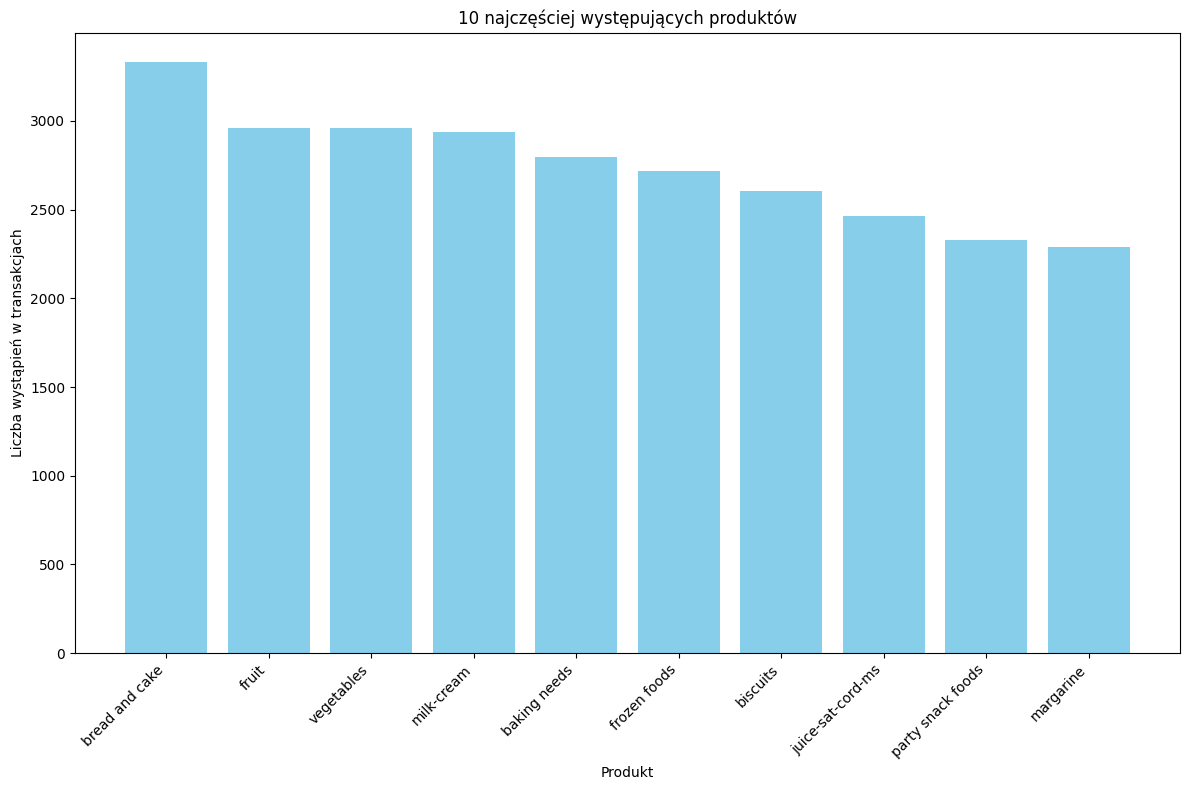

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Zliczenie wystąpień wszystkich produktów
all_items = [item for transaction in filtered_transactions for item in transaction]

# 2. Wybranie 10 najczęściej występujących produktów
item_counts = Counter(all_items)
top_10_items = item_counts.most_common(10)
df_top10 = pd.DataFrame(top_10_items, columns=['Produkt', 'Liczba wystąpień'])

# 3. Rysowanie histogramu
plt.figure(figsize=(12, 8))
plt.bar(df_top10['Produkt'], df_top10['Liczba wystąpień'], color='skyblue')
plt.xlabel('Produkt')
plt.ylabel('Liczba wystąpień w transakcjach')
plt.title('10 najczęściej występujących produktów')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Wnioski

Jak widać pierwsze 5 produktów najczęściej kupowanych to są też te produkty, które wystąpiły w zbiorze w poprzednim zadaniu. Są to też produkty podstawowe, dlatego nie dziwi, że są najpopularniejsze.

## Zad 3

In [8]:
from mlxtend.frequent_patterns import association_rules

# 1. Wygenerowanie zbiorów częstych z min_support=0.25
frequent_itemsets_25 = apriori(df_onehot, min_support=0.25, use_colnames=True)

# 2. Wygenerowanie reguł z min_confidence=0.70
rules = association_rules(frequent_itemsets_25, metric="confidence", min_threshold=0.70)

# Wyświetlenie uzyskanych reguł
print("Wygenerowane reguły asocjacyjne:")
print(rules.sort_values(by='confidence', ascending=False))


Wygenerowane reguły asocjacyjne:
                             antecedents       consequents  \
190        (biscuits, fruit, vegetables)  (bread and cake)   
192    (vegetables, fruit, frozen foods)  (bread and cake)   
179    (fruit, baking needs, milk-cream)  (bread and cake)   
116                   (fruit, margarine)  (bread and cake)   
84                (biscuits, vegetables)  (bread and cake)   
..                                   ...               ...   
26                      (breakfast food)           (fruit)   
159           (vegetables, frozen foods)      (milk-cream)   
180  (vegetables, bread and cake, fruit)    (baking needs)   
99                (biscuits, vegetables)      (milk-cream)   
3                    (tissues-paper prd)    (baking needs)   

     antecedent support  consequent support   support  confidence      lift  \
190            0.305151            0.723756  0.264290    0.866097  1.196670   
192            0.315366            0.723756  0.269941    0.85596

In [5]:
print("=====================================================================")
print("             ANALIZA REGUŁ POSORTOWANYCH WEDŁUG MIARY 'LIFT'")
print("=====================================================================\n")

# Sortowanie reguł malejąco według miary LIFT
rules_sorted_by_lift = rules.sort_values(by='lift', ascending=False)

print("----------- 5 REGUŁ O NAJWYŻSZEJ WARTOŚCI LIFT -----------\n")
print(rules_sorted_by_lift.head(5))

print("\n----------- 5 REGUŁ O NAJNIŻSZEJ WARTOŚCI LIFT (ale wciąż > 1) -----------\n")
print(rules_sorted_by_lift.tail(5))


print("\n\n=====================================================================")
print("          ANALIZA REGUŁ POSORTOWANYCH WEDŁUG MIARY 'CONFIDENCE'")
print("=====================================================================\n")

# Sortowanie reguł malejąco według miary CONFIDENCE
rules_sorted_by_confidence = rules.sort_values(by='confidence', ascending=False)

print("----------- 5 REGUŁ O NAJWYŻSZEJ WARTOŚCI CONFIDENCE -----------\n")
print(rules_sorted_by_confidence.head(5))

print("\n----------- 5 REGUŁ O NAJNIŻSZEJ WARTOŚCI CONFIDENCE (ale wciąż >= 0.70) -----------\n")
print(rules_sorted_by_confidence.tail(5))


print("\n\n=====================================================================")
print("           ANALIZA REGUŁ POSORTOWANYCH WEDŁUG MIARY 'SUPPORT'")
print("=====================================================================\n")

# Sortowanie reguł malejąco według miary SUPPORT
rules_sorted_by_support = rules.sort_values(by='support', ascending=False)

print("----------- 5 REGUŁ O NAJWYŻSZEJ WARTOŚCI SUPPORT -----------\n")
print(rules_sorted_by_support.head(5))

print("\n----------- 5 REGUŁ O NAJNIŻSZEJ WARTOŚCI SUPPORT (ale wciąż >= 0.25) -----------\n")
print(rules_sorted_by_support.tail(5))

             ANALIZA REGUŁ POSORTOWANYCH WEDŁUG MIARY 'LIFT'

----------- 5 REGUŁ O NAJWYŻSZEJ WARTOŚCI LIFT -----------

                                antecedents consequents  antecedent support  \
90        (party snack foods, frozen foods)  (biscuits)            0.343838   
96               (party snack foods, fruit)  (biscuits)            0.346012   
81      (bread and cake, party snack foods)  (biscuits)            0.392958   
189  (biscuits, bread and cake, vegetables)     (fruit)            0.323191   
38             (frozen foods, baking needs)  (biscuits)            0.398826   

     consequent support   support  confidence      lift  representativity  \
90             0.566181  0.256031    0.744627  1.315174               1.0   
96             0.566181  0.250163    0.722990  1.276958               1.0   
81             0.566181  0.283851    0.722345  1.275820               1.0   
189            0.643773  0.264290    0.817754  1.270252               1.0   
38             0.5

### Wnioski

Poniżej zinterpretowano najważniejsze przykłady, wybrane na podstawie najwyższych wartości kluczowych metryk:

1.  Reguła o najwyższej mierze `lift`:
    - Reguła: `{party snack foods, frozen foods} -> {biscuits}`
    - Metryki: `lift` = 1.32, `confidence` = 74.5%
    - Interpretacja: Zakup produktów z kategorii `party snack foods` oraz `frozen foods` zwiększa prawdopodobieństwo zakupu ciastek (`biscuits`) o **32%** w stosunku do sytuacji, gdyby te produkty były od siebie niezależne. Reguła ta wskazuje na istnienie konkretnego wzorca zakupowego, gdzie klienci zaopatrujący się w jedne rodzaje przekąsek, bardzo chętnie sięgają po kolejne.

2.  Reguła o najwyższej mierze `confidence`:
    - Reguła: `{biscuits, fruit, vegetables} -> {bread and cake}`
    - Metryki: `confidence` = 86.6%, `lift` = 1.20
    - Interpretacja: Jeżeli klient umieścił już w swoim koszyku ciastka, owoce i warzywa, to istnieje aż **86,6% pewności**, że kupi również pieczywo lub ciasto. Jest to reguła z bardzo dużą dozą pewności oraz zauważalnym liftem - co sugeruje rzeczywiste tendencje zakupowe klientów, a nie przypadek. Sprawdzi się bardzo dobrze w preferencjach zakupowych klientów.

3.  Reguła o najwyższej mierze `support`:
    - Reguła: `{milk-cream} -> {bread and cake}`
    - Metryki: `support` = 50.8%, `confidence` = 79.5%
    - Interpretacja: Połączenie produktów `milk-cream` oraz `bread an cake` jest najpopularniejszą parą w całym zbiorze danych – występuje w ponad połowie (**50,8%**) wszystkich transakcji. To bardzo popularne połączenie, które znajduje się w większości koszyków klientów.

#### Ocena Wartości Reguł na Podstawie Metryk

Połączenie wysokiej ufności (co najmniej 70%), istotnego wsparcia (co najmniej 25%) oraz miary `lift` większej od 1 sprawia, że wygenerowane reguły są statystycznie poprawne oraz są wartościowe z perspektywy biznesowej - można dzięki nim tworzyć prawdziwe predykcje na temat wzorców zakupowych klientów.

## Zad 4

In [ ]:
%pip install tabulate

In [17]:
from IPython.display import display, Markdown

# Odfiltrowujemy tylko elementy 'department'
filtered_transactions = []
for transaction in transactions:
    filtered_transaction = [
        item for item in transaction if not item.startswith('department')
    ]
    if filtered_transaction:
        filtered_transactions.append(filtered_transaction)

# Krok 2: Kodowanie danych w formacie one-hot
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# Krok 3: Wygenerowanie zbiorów częstych z min_support=0.16
frequent_itemsets_16 = apriori(df_onehot, min_support=0.16, use_colnames=True)

# Krok 4: Wygenerowanie reguł z min_confidence=0.50
rules_all = association_rules(frequent_itemsets_16, metric="confidence", min_threshold=0.50)

# Krok 5: Wybór reguł prowadzących wyłącznie do {high}
rules_with_high = rules_all[rules_all['consequents'] == frozenset({'high'})]

rules_with_high_sorted = rules_with_high.sort_values(by='lift', ascending=False)

# Krok 6: Wyświetlenie wyników
print("Reguły prowadzące do wysokiej wartości rachunku (X -> {high}):\n")
if rules_with_high_sorted.empty:
    print("Nie znaleziono reguł spełniających podane kryteria.")
else:
    display(Markdown(rules_with_high_sorted.to_markdown(index=False)))

Reguły prowadzące do wysokiej wartości rachunku (X -> {high}):



| antecedents                                                               | consequents         |   antecedent support |   consequent support |   support |   confidence |    lift |   representativity |   leverage |   conviction |   zhangs_metric |   jaccard |   certainty |   kulczynski |
|:--------------------------------------------------------------------------|:--------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-------------------:|-----------:|-------------:|----------------:|----------:|------------:|-------------:|
| frozenset({'biscuits', 'tissues-paper prd', 'frozen foods'})              | frozenset({'high'}) |             0.231684 |              0.36287 |  0.160363 |     0.692164 | 1.90747 |                  1 |  0.076292  |      2.06971 |        0.619205 |  0.369338 |    0.51684  |     0.567047 |
| frozenset({'tissues-paper prd', 'frozen foods', 'baking needs'})          | frozenset({'high'}) |             0.241625 |              0.36287 |  0.162957 |     0.674419 | 1.85857 |                  1 |  0.075278  |      1.9569  |        0.609133 |  0.369065 |    0.488987 |     0.561748 |
| frozenset({'biscuits', 'bread and cake', 'frozen foods', 'baking needs'}) | frozenset({'high'}) |             0.240545 |              0.36287 |  0.160363 |     0.666667 | 1.8372  |                  1 |  0.0730766 |      1.91139 |        0.600028 |  0.361951 |    0.47682  |     0.554298 |
| frozenset({'biscuits', 'bread and cake', 'sauces-gravy-pkle'})            | frozenset({'high'}) |             0.248109 |              0.36287 |  0.163605 |     0.659408 | 1.8172  |                  1 |  0.0735736 |      1.87065 |        0.598096 |  0.3657   |    0.465427 |     0.555136 |
| frozenset({'bread and cake', 'tissues-paper prd', 'frozen foods'})        | frozenset({'high'}) |             0.267776 |              0.36287 |  0.175924 |     0.656981 | 1.81051 |                  1 |  0.078756  |      1.85742 |        0.611385 |  0.386882 |    0.461619 |     0.570897 |
| frozenset({'biscuits', 'bread and cake', 'tissues-paper prd'})            | frozenset({'high'}) |             0.261292 |              0.36287 |  0.170305 |     0.651778 | 1.79618 |                  1 |  0.0754895 |      1.82967 |        0.60005  |  0.375238 |    0.453453 |     0.560553 |
| frozenset({'bread and cake', 'frozen foods', 'sauces-gravy-pkle'})        | frozenset({'high'}) |             0.262373 |              0.36287 |  0.170953 |     0.651565 | 1.79559 |                  1 |  0.0757458 |      1.82855 |        0.600682 |  0.376308 |    0.453118 |     0.561339 |
| frozenset({'bread and cake', 'baking needs', 'sauces-gravy-pkle'})        | frozenset({'high'}) |             0.264318 |              0.36287 |  0.171169 |     0.647588 | 1.78463 |                  1 |  0.0752561 |      1.80791 |        0.597621 |  0.375355 |    0.446876 |     0.559649 |
| frozenset({'tissues-paper prd', 'sauces-gravy-pkle'})                     | frozenset({'high'}) |             0.278798 |              0.36287 |  0.179382 |     0.643411 | 1.77312 |                  1 |  0.0782143 |      1.78673 |        0.604576 |  0.388032 |    0.44032  |     0.568876 |
| frozenset({'bread and cake', 'tissues-paper prd', 'baking needs'})        | frozenset({'high'}) |             0.279663 |              0.36287 |  0.177653 |     0.63524  | 1.7506  |                  1 |  0.0761716 |      1.74671 |        0.59523  |  0.382148 |    0.427494 |     0.562408 |
| frozenset({'biscuits', 'party snack foods', 'frozen foods'})              | frozenset({'high'}) |             0.254593 |              0.36287 |  0.161444 |     0.634126 | 1.74753 |                  1 |  0.0690597 |      1.74139 |        0.573865 |  0.354028 |    0.425746 |     0.539517 |
| frozenset({'bread and cake', 'baking needs', 'party snack foods'})        | frozenset({'high'}) |             0.271018 |              0.36287 |  0.170089 |     0.627592 | 1.72952 |                  1 |  0.0717443 |      1.71084 |        0.578623 |  0.366729 |    0.415491 |     0.548162 |
| frozenset({'biscuits', 'frozen foods', 'baking needs'})                   | frozenset({'high'}) |             0.284418 |              0.36287 |  0.178301 |     0.6269   | 1.72761 |                  1 |  0.0750946 |      1.70766 |        0.588566 |  0.380184 |    0.414405 |     0.559132 |
| frozenset({'bread and cake', 'frozen foods', 'party snack foods'})        | frozenset({'high'}) |             0.277285 |              0.36287 |  0.173547 |     0.625877 | 1.7248  |                  1 |  0.072928  |      1.703   |        0.581448 |  0.371931 |    0.412799 |     0.552069 |
| frozenset({'vegetables', 'bread and cake', 'tissues-paper prd'})          | frozenset({'high'}) |             0.279447 |              0.36287 |  0.174843 |     0.625677 | 1.72424 |                  1 |  0.0734404 |      1.70208 |        0.582935 |  0.374018 |    0.412485 |     0.553756 |
| frozenset({'party snack foods', 'sauces-gravy-pkle'})                     | frozenset({'high'}) |             0.283553 |              0.36287 |  0.17614  |     0.621189 | 1.71188 |                  1 |  0.0732471 |      1.68192 |        0.580428 |  0.37454  |    0.405442 |     0.553299 |
| frozenset({'bread and cake', 'fruit', 'sauces-gravy-pkle'})               | frozenset({'high'}) |             0.264967 |              0.36287 |  0.163821 |     0.618271 | 1.70384 |                  1 |  0.0676726 |      1.66906 |        0.562    |  0.353051 |    0.400861 |     0.534865 |
| frozenset({'biscuits', 'frozen foods', 'vegetables'})                     | frozenset({'high'}) |             0.278798 |              0.36287 |  0.17225  |     0.617829 | 1.70262 |                  1 |  0.0710822 |      1.66714 |        0.572197 |  0.366943 |    0.400169 |     0.546258 |
| frozenset({'frozen foods', 'pet foods'})                                  | frozenset({'high'}) |             0.267776 |              0.36287 |  0.165118 |     0.616626 | 1.6993  |                  1 |  0.0679498 |      1.6619  |        0.562019 |  0.354689 |    0.39828  |     0.53583  |
| frozenset({'bread and cake', 'margarine', 'frozen foods'})                | frozenset({'high'}) |             0.269937 |              0.36287 |  0.166415 |     0.616493 | 1.69894 |                  1 |  0.0684623 |      1.66133 |        0.563508 |  0.356812 |    0.398071 |     0.53755  |
| frozenset({'vegetables', 'tissues-paper prd', 'fruit'})                   | frozenset({'high'}) |             0.264534 |              0.36287 |  0.162957 |     0.616013 | 1.69761 |                  1 |  0.066965  |      1.65925 |        0.558745 |  0.350861 |    0.397318 |     0.532545 |
| frozenset({'vegetables', 'bread and cake', 'sauces-gravy-pkle'})          | frozenset({'high'}) |             0.274044 |              0.36287 |  0.168792 |     0.615931 | 1.69739 |                  1 |  0.0693496 |      1.65889 |        0.565955 |  0.360572 |    0.397188 |     0.540544 |
| frozenset({'party snack foods', 'tissues-paper prd'})                     | frozenset({'high'}) |             0.28096  |              0.36287 |  0.172682 |     0.614615 | 1.69376 |                  1 |  0.0707302 |      1.65323 |        0.569645 |  0.366514 |    0.395124 |     0.545247 |
| frozenset({'biscuits', 'sauces-gravy-pkle'})                              | frozenset({'high'}) |             0.303869 |              0.36287 |  0.18673  |     0.614509 | 1.69347 |                  1 |  0.0764652 |      1.65278 |        0.588245 |  0.389014 |    0.394957 |     0.564551 |
| frozenset({'vegetables', 'bread and cake', 'fruit', 'biscuits'})          | frozenset({'high'}) |             0.262805 |              0.36287 |  0.161228 |     0.613487 | 1.69065 |                  1 |  0.0658634 |      1.6484  |        0.554144 |  0.347138 |    0.393353 |     0.528899 |
| frozenset({'biscuits', 'tissues-paper prd'})                              | frozenset({'high'}) |             0.314026 |              0.36287 |  0.192565 |     0.613214 | 1.6899  |                  1 |  0.0786146 |      1.64724 |        0.595138 |  0.39759  |    0.392924 |     0.571944 |
| frozenset({'biscuits', 'vegetables', 'baking needs'})                     | frozenset({'high'}) |             0.272963 |              0.36287 |  0.166847 |     0.611243 | 1.68447 |                  1 |  0.0677966 |      1.63889 |        0.5589   |  0.35576  |    0.389831 |     0.53552  |
| frozenset({'bread and cake', 'fruit', 'tissues-paper prd'})               | frozenset({'high'}) |             0.280311 |              0.36287 |  0.171169 |     0.61064  | 1.68281 |                  1 |  0.0694527 |      1.63635 |        0.563791 |  0.362637 |    0.388884 |     0.541175 |
| frozenset({'vegetables', 'bread and cake', 'fruit', 'frozen foods'})      | frozenset({'high'}) |             0.268424 |              0.36287 |  0.163605 |     0.609501 | 1.67967 |                  1 |  0.0662017 |      1.63158 |        0.553113 |  0.349815 |    0.387096 |     0.530182 |
| frozenset({'biscuits', 'bread and cake', 'margarine'})                    | frozenset({'high'}) |             0.27037  |              0.36287 |  0.164686 |     0.609113 | 1.6786  |                  1 |  0.0665765 |      1.62996 |        0.554067 |  0.351476 |    0.386487 |     0.531477 |
| frozenset({'biscuits', 'bread and cake', 'party snack foods'})            | frozenset({'high'}) |             0.282256 |              0.36287 |  0.171818 |     0.608729 | 1.67754 |                  1 |  0.0693952 |      1.62836 |        0.56272  |  0.363014 |    0.385885 |     0.541113 |
| frozenset({'margarine', 'sauces-gravy-pkle'})                             | frozenset({'high'}) |             0.272531 |              0.36287 |  0.165766 |     0.608247 | 1.67621 |                  1 |  0.0668729 |      1.62636 |        0.554548 |  0.352968 |    0.385129 |     0.532533 |
| frozenset({'vegetables', 'frozen foods', 'baking needs'})                 | frozenset({'high'}) |             0.287227 |              0.36287 |  0.174411 |     0.607223 | 1.67339 |                  1 |  0.0701849 |      1.62212 |        0.564571 |  0.366652 |    0.383522 |     0.543933 |
| frozenset({'bread and cake', 'frozen foods', 'baking needs'})             | frozenset({'high'}) |             0.320942 |              0.36287 |  0.194727 |     0.606734 | 1.67204 |                  1 |  0.0782662 |      1.6201  |        0.591892 |  0.398144 |    0.382754 |     0.571681 |
| frozenset({'bread and cake', 'juice-sat-cord-ms', 'frozen foods'})        | frozenset({'high'}) |             0.277069 |              0.36287 |  0.167927 |     0.606084 | 1.67025 |                  1 |  0.0673872 |      1.61743 |        0.555085 |  0.355769 |    0.381734 |     0.53443  |
| frozenset({'tissues-paper prd', 'frozen foods'})                          | frozenset({'high'}) |             0.325265 |              0.36287 |  0.197104 |     0.60598  | 1.66996 |                  1 |  0.0790751 |      1.617   |        0.594581 |  0.401408 |    0.38157  |     0.57458  |
| frozenset({'tissues-paper prd', 'margarine'})                             | frozenset({'high'}) |             0.29155  |              0.36287 |  0.176356 |     0.604893 | 1.66697 |                  1 |  0.0705615 |      1.61255 |        0.564765 |  0.368897 |    0.379864 |     0.545448 |
| frozenset({'frozen foods', 'sauces-gravy-pkle'})                          | frozenset({'high'}) |             0.323536 |              0.36287 |  0.195375 |     0.603874 | 1.66416 |                  1 |  0.0779735 |      1.6084  |        0.589975 |  0.397887 |    0.378266 |     0.571145 |
| frozenset({'biscuits', 'bread and cake', 'juice-sat-cord-ms'})            | frozenset({'high'}) |             0.272099 |              0.36287 |  0.164253 |     0.603654 | 1.66355 |                  1 |  0.0655169 |      1.60751 |        0.547982 |  0.348944 |    0.377919 |     0.528152 |
| frozenset({'biscuits', 'bread and cake', 'baking needs'})                 | frozenset({'high'}) |             0.314675 |              0.36287 |  0.189756 |     0.603022 | 1.66181 |                  1 |  0.0755697 |      1.60495 |        0.581107 |  0.389012 |    0.376928 |     0.562976 |
| frozenset({'biscuits', 'fruit', 'frozen foods'})                          | frozenset({'high'}) |             0.282905 |              0.36287 |  0.170305 |     0.601986 | 1.65896 |                  1 |  0.0676471 |      1.60077 |        0.553918 |  0.358182 |    0.375302 |     0.535657 |
| frozenset({'tissues-paper prd', 'juice-sat-cord-ms'})                     | frozenset({'high'}) |             0.29263  |              0.36287 |  0.17614  |     0.60192  | 1.65878 |                  1 |  0.0699533 |      1.60051 |        0.56144  |  0.367448 |    0.375198 |     0.543664 |
| frozenset({'fruit', 'frozen foods', 'baking needs'})                      | frozenset({'high'}) |             0.276853 |              0.36287 |  0.166415 |     0.601093 | 1.6565  |                  1 |  0.0659528 |      1.59719 |        0.548044 |  0.351598 |    0.3739   |     0.52985  |
| frozenset({'party snack foods', 'margarine'})                             | frozenset({'high'}) |             0.266912 |              0.36287 |  0.160363 |     0.60081  | 1.65572 |                  1 |  0.0635088 |      1.59606 |        0.540223 |  0.341621 |    0.373455 |     0.52137  |
| frozenset({'baking needs', 'pet foods'})                                  | frozenset({'high'}) |             0.272099 |              0.36287 |  0.163389 |     0.600477 | 1.6548  |                  1 |  0.0646524 |      1.59472 |        0.543613 |  0.346471 |    0.372933 |     0.525372 |
| frozenset({'cheese', 'frozen foods'})                                     | frozenset({'high'}) |             0.268208 |              0.36287 |  0.161011 |     0.600322 | 1.65437 |                  1 |  0.0636867 |      1.59411 |        0.540511 |  0.342529 |    0.37269  |     0.522019 |
| frozenset({'biscuits', 'breakfast food'})                                 | frozenset({'high'}) |             0.267344 |              0.36287 |  0.160363 |     0.599838 | 1.65304 |                  1 |  0.063352  |      1.59218 |        0.539207 |  0.341306 |    0.371931 |     0.520884 |
| frozenset({'vegetables', 'bread and cake', 'fruit', 'baking needs'})      | frozenset({'high'}) |             0.271234 |              0.36287 |  0.162524 |     0.599203 | 1.65129 |                  1 |  0.0641016 |      1.58966 |        0.541206 |  0.344638 |    0.370934 |     0.523544 |
| frozenset({'vegetables', 'bread and cake', 'party snack foods'})          | frozenset({'high'}) |             0.275124 |              0.36287 |  0.164469 |     0.5978   | 1.64742 |                  1 |  0.064635  |      1.58411 |        0.54215  |  0.34733  |    0.368732 |     0.525523 |
| frozenset({'juice-sat-cord-ms', 'sauces-gravy-pkle'})                     | frozenset({'high'}) |             0.286147 |              0.36287 |  0.170953 |     0.597432 | 1.64641 |                  1 |  0.0671191 |      1.58266 |        0.549996 |  0.357595 |    0.368154 |     0.534273 |
| frozenset({'frozen foods', 'baking needs', 'milk-cream'})                 | frozenset({'high'}) |             0.275773 |              0.36287 |  0.164686 |     0.597179 | 1.64571 |                  1 |  0.0646159 |      1.58167 |        0.541763 |  0.347469 |    0.367756 |     0.52551  |
| frozenset({'baking needs', 'sauces-gravy-pkle'})                          | frozenset({'high'}) |             0.328723 |              0.36287 |  0.196239 |     0.596976 | 1.64515 |                  1 |  0.0769558 |      1.58087 |        0.584189 |  0.396161 |    0.367438 |     0.568887 |
| frozenset({'biscuits', 'bread and cake', 'frozen foods'})                 | frozenset({'high'}) |             0.326345 |              0.36287 |  0.19451  |     0.596026 | 1.64253 |                  1 |  0.0760895 |      1.57716 |        0.58069  |  0.393185 |    0.365948 |     0.56603  |
| frozenset({'biscuits', 'frozen foods', 'milk-cream'})                     | frozenset({'high'}) |             0.271234 |              0.36287 |  0.16166  |     0.596016 | 1.6425  |                  1 |  0.0632371 |      1.57712 |        0.536762 |  0.342177 |    0.365931 |     0.52076  |
| frozenset({'biscuits', 'fruit', 'baking needs'})                          | frozenset({'high'}) |             0.275989 |              0.36287 |  0.164253 |     0.595145 | 1.6401  |                  1 |  0.0641052 |      1.57372 |        0.539056 |  0.346084 |    0.364564 |     0.523898 |
| frozenset({'tissues-paper prd', 'baking needs'})                          | frozenset({'high'}) |             0.339961 |              0.36287 |  0.201643 |     0.593134 | 1.63456 |                  1 |  0.0782808 |      1.56595 |        0.588171 |  0.402329 |    0.361408 |     0.574411 |
| frozenset({'bread and cake', 'tissues-paper prd', 'milk-cream'})          | frozenset({'high'}) |             0.275557 |              0.36287 |  0.162957 |     0.591373 | 1.62971 |                  1 |  0.0629653 |      1.5592  |        0.533366 |  0.342727 |    0.358643 |     0.520225 |
| frozenset({'bread and cake', 'juice-sat-cord-ms', 'baking needs'})        | frozenset({'high'}) |             0.279014 |              0.36287 |  0.164902 |     0.591015 | 1.62872 |                  1 |  0.0636556 |      1.55783 |        0.535409 |  0.345718 |    0.358082 |     0.522726 |
| frozenset({'bread and cake', 'fruit', 'party snack foods'})               | frozenset({'high'}) |             0.285498 |              0.36287 |  0.16836  |     0.589705 | 1.62511 |                  1 |  0.0647609 |      1.55286 |        0.538358 |  0.350743 |    0.356026 |     0.526836 |
| frozenset({'vegetables', 'tissues-paper prd'})                            | frozenset({'high'}) |             0.336935 |              0.36287 |  0.196023 |     0.581783 | 1.60328 |                  1 |  0.0737596 |      1.52344 |        0.567485 |  0.389103 |    0.343593 |     0.560993 |
| frozenset({'bread and cake', 'margarine', 'baking needs'})                | frozenset({'high'}) |             0.293495 |              0.36287 |  0.170737 |     0.581738 | 1.60316 |                  1 |  0.0642365 |      1.52328 |        0.532524 |  0.35158  |    0.343521 |     0.526128 |
| frozenset({'biscuits', 'fruit', 'vegetables'})                            | frozenset({'high'}) |             0.303436 |              0.36287 |  0.17614  |     0.580484 | 1.5997  |                  1 |  0.0660321 |      1.51873 |        0.53819  |  0.359347 |    0.341554 |     0.532946 |
| frozenset({'party snack foods', 'baking needs'})                          | frozenset({'high'}) |             0.330668 |              0.36287 |  0.191485 |     0.579085 | 1.59585 |                  1 |  0.0714953 |      1.51368 |        0.55783  |  0.381403 |    0.339358 |     0.55339  |
| frozenset({'cheese', 'baking needs'})                                     | frozenset({'high'}) |             0.284201 |              0.36287 |  0.164469 |     0.578707 | 1.59481 |                  1 |  0.0613412 |      1.51232 |        0.521046 |  0.340797 |    0.338765 |     0.515977 |
| frozenset({'vegetables', 'bread and cake', 'margarine'})                  | frozenset({'high'}) |             0.285714 |              0.36287 |  0.165118 |     0.577912 | 1.59261 |                  1 |  0.0614406 |      1.50947 |        0.520942 |  0.341529 |    0.337517 |     0.516473 |
| frozenset({'biscuits', 'bread and cake', 'vegetables'})                   | frozenset({'high'}) |             0.321375 |              0.36287 |  0.185433 |     0.577001 | 1.5901  |                  1 |  0.0688161 |      1.50622 |        0.546855 |  0.37175  |    0.336086 |     0.54401  |
| frozenset({'vegetables', 'fruit', 'frozen foods'})                        | frozenset({'high'}) |             0.313594 |              0.36287 |  0.180246 |     0.574776 | 1.58397 |                  1 |  0.0664524 |      1.49834 |        0.53711  |  0.36324  |    0.332595 |     0.53575  |
| frozenset({'vegetables', 'bread and cake', 'frozen foods'})               | frozenset({'high'}) |             0.334558 |              0.36287 |  0.192133 |     0.574289 | 1.58263 |                  1 |  0.070732  |      1.49663 |        0.553227 |  0.38024  |    0.331831 |     0.551886 |
| frozenset({'biscuits', 'margarine'})                                      | frozenset({'high'}) |             0.322671 |              0.36287 |  0.185001 |     0.573342 | 1.58002 |                  1 |  0.0679133 |      1.4933  |        0.541977 |  0.369603 |    0.330344 |     0.541585 |
| frozenset({'vegetables', 'bread and cake', 'juice-sat-cord-ms'})          | frozenset({'high'}) |             0.28593  |              0.36287 |  0.163821 |     0.57294  | 1.57891 |                  1 |  0.0600655 |      1.4919  |        0.513469 |  0.33779  |    0.329713 |     0.5122   |
| frozenset({'vegetables', 'pet foods'})                                    | frozenset({'high'}) |             0.287443 |              0.36287 |  0.164469 |     0.57218  | 1.57682 |                  1 |  0.0601648 |      1.48925 |        0.513379 |  0.338523 |    0.328521 |     0.512713 |
| frozenset({'party snack foods', 'frozen foods'})                          | frozenset({'high'}) |             0.341906 |              0.36287 |  0.195375 |     0.571429 | 1.57475 |                  1 |  0.0713074 |      1.48664 |        0.554598 |  0.383538 |    0.327341 |     0.554922 |
| frozenset({'fruit', 'sauces-gravy-pkle'})                                 | frozenset({'high'}) |             0.322023 |              0.36287 |  0.183272 |     0.569128 | 1.56841 |                  1 |  0.0664196 |      1.4787  |        0.534546 |  0.36536  |    0.323729 |     0.537095 |
| frozenset({'margarine', 'frozen foods'})                                  | frozenset({'high'}) |             0.330884 |              0.36287 |  0.188027 |     0.568256 | 1.566   |                  1 |  0.0679589 |      1.47571 |        0.540163 |  0.371795 |    0.322361 |     0.543211 |
| frozenset({'vegetables', 'frozen foods', 'milk-cream'})                   | frozenset({'high'}) |             0.285066 |              0.36287 |  0.16166  |     0.567096 | 1.56281 |                  1 |  0.0582179 |      1.47176 |        0.503719 |  0.332444 |    0.320541 |     0.5063   |
| frozenset({'vegetables', 'sauces-gravy-pkle'})                            | frozenset({'high'}) |             0.336719 |              0.36287 |  0.190836 |     0.566752 | 1.56186 |                  1 |  0.068651  |      1.47059 |        0.542361 |  0.375106 |    0.320001 |     0.54633  |
| frozenset({'bread and cake', 'fruit', 'frozen foods'})                    | frozenset({'high'}) |             0.334558 |              0.36287 |  0.18954  |     0.566537 | 1.56127 |                  1 |  0.0681385 |      1.46986 |        0.540235 |  0.373191 |    0.319664 |     0.544436 |
| frozenset({'bread and cake', 'sauces-gravy-pkle'})                        | frozenset({'high'}) |             0.36957  |              0.36287 |  0.208991 |     0.565497 | 1.5584  |                  1 |  0.0748848 |      1.46634 |        0.568368 |  0.399257 |    0.318031 |     0.570718 |
| frozenset({'bread and cake', 'tissues-paper prd'})                        | frozenset({'high'}) |             0.383834 |              0.36287 |  0.216987 |     0.565315 | 1.5579  |                  1 |  0.0777054 |      1.46573 |        0.581191 |  0.409629 |    0.317746 |     0.581645 |
| frozenset({'breakfast food', 'baking needs'})                             | frozenset({'high'}) |             0.288524 |              0.36287 |  0.162957 |     0.564794 | 1.55646 |                  1 |  0.0582599 |      1.46397 |        0.502501 |  0.333628 |    0.316927 |     0.506935 |
| frozenset({'vegetables', 'cheese'})                                       | frozenset({'high'}) |             0.289821 |              0.36287 |  0.163605 |     0.564504 | 1.55566 |                  1 |  0.0584377 |      1.463   |        0.502954 |  0.334512 |    0.316472 |     0.507684 |
| frozenset({'bread and cake', 'fruit', 'juice-sat-cord-ms'})               | frozenset({'high'}) |             0.293062 |              0.36287 |  0.165334 |     0.564159 | 1.55471 |                  1 |  0.0589903 |      1.46184 |        0.504705 |  0.337004 |    0.315931 |     0.509894 |
| frozenset({'juice-sat-cord-ms', 'margarine'})                             | frozenset({'high'}) |             0.294359 |              0.36287 |  0.165982 |     0.563877 | 1.55394 |                  1 |  0.0591681 |      1.46089 |        0.505176 |  0.337879 |    0.315488 |     0.510646 |
| frozenset({'bread and cake', 'pet foods'})                                | frozenset({'high'}) |             0.322023 |              0.36287 |  0.181327 |     0.563087 | 1.55176 |                  1 |  0.0644745 |      1.45825 |        0.524458 |  0.360086 |    0.314249 |     0.531395 |
| frozenset({'fruit', 'frozen foods', 'milk-cream'})                        | frozenset({'high'}) |             0.285714 |              0.36287 |  0.160579 |     0.562027 | 1.54884 |                  1 |  0.056902  |      1.45472 |        0.496097 |  0.329052 |    0.312585 |     0.502276 |
| frozenset({'biscuits', 'bread and cake', 'fruit'})                        | frozenset({'high'}) |             0.333045 |              0.36287 |  0.187162 |     0.561973 | 1.54869 |                  1 |  0.0663102 |      1.45454 |        0.531209 |  0.367884 |    0.312499 |     0.538878 |
| frozenset({'tissues-paper prd', 'fruit'})                                 | frozenset({'high'}) |             0.338664 |              0.36287 |  0.189756 |     0.560306 | 1.5441  |                  1 |  0.0668646 |      1.44903 |        0.532819 |  0.370777 |    0.309884 |     0.541618 |
| frozenset({'biscuits', 'party snack foods'})                              | frozenset({'high'}) |             0.344067 |              0.36287 |  0.192781 |     0.560302 | 1.54408 |                  1 |  0.0679297 |      1.44902 |        0.537199 |  0.374947 |    0.309876 |     0.545785 |
| frozenset({'vegetables', 'bread and cake', 'baking needs'})               | frozenset({'high'}) |             0.342771 |              0.36287 |  0.191917 |     0.559899 | 1.54297 |                  1 |  0.0675358 |      1.44769 |        0.535431 |  0.37358  |    0.309245 |     0.544393 |
| frozenset({'tissues-paper prd', 'milk-cream'})                            | frozenset({'high'}) |             0.32721  |              0.36287 |  0.183056 |     0.559445 | 1.54172 |                  1 |  0.0643213 |      1.4462  |        0.522265 |  0.36104  |    0.308532 |     0.531956 |
| frozenset({'bread and cake', 'cheese'})                                   | frozenset({'high'}) |             0.322455 |              0.36287 |  0.180246 |     0.558981 | 1.54044 |                  1 |  0.063237  |      1.44468 |        0.517806 |  0.356868 |    0.307804 |     0.527853 |
| frozenset({'biscuits', 'baking needs'})                                   | frozenset({'high'}) |             0.381241 |              0.36287 |  0.213097 |     0.558957 | 1.54038 |                  1 |  0.0747562 |      1.4446  |        0.566954 |  0.401302 |    0.307766 |     0.573106 |
| frozenset({'biscuits', 'juice-sat-cord-ms'})                              | frozenset({'high'}) |             0.333261 |              0.36287 |  0.186082 |     0.558366 | 1.53875 |                  1 |  0.0651511 |      1.44266 |        0.525125 |  0.364831 |    0.306838 |     0.535585 |
| frozenset({'vegetables', 'fruit', 'baking needs'})                        | frozenset({'high'}) |             0.321807 |              0.36287 |  0.179598 |     0.558093 | 1.538   |                  1 |  0.0628239 |      1.44177 |        0.515787 |  0.355584 |    0.306409 |     0.526515 |
| frozenset({'bread and cake', 'frozen foods', 'milk-cream'})               | frozenset({'high'}) |             0.327642 |              0.36287 |  0.18284  |     0.558047 | 1.53787 |                  1 |  0.0639483 |      1.44163 |        0.520185 |  0.360153 |    0.306338 |     0.530959 |
| frozenset({'breakfast food', 'bread and cake'})                           | frozenset({'high'}) |             0.311433 |              0.36287 |  0.173114 |     0.555864 | 1.53185 |                  1 |  0.0601046 |      1.43454 |        0.50423  |  0.345408 |    0.302911 |     0.516467 |
| frozenset({'biscuits', 'frozen foods'})                                   | frozenset({'high'}) |             0.391182 |              0.36287 |  0.217419 |     0.555801 | 1.53168 |                  1 |  0.0754712 |      1.43433 |        0.570158 |  0.405155 |    0.302813 |     0.577484 |
| frozenset({'bread and cake', 'fruit', 'baking needs'})                    | frozenset({'high'}) |             0.338016 |              0.36287 |  0.187811 |     0.555627 | 1.5312  |                  1 |  0.0651548 |      1.43377 |        0.524057 |  0.366049 |    0.302539 |     0.536598 |
| frozenset({'frozen foods', 'baking needs'})                               | frozenset({'high'}) |             0.396585 |              0.36287 |  0.220013 |     0.554768 | 1.52883 |                  1 |  0.076104  |      1.43101 |        0.573249 |  0.407853 |    0.301192 |     0.580541 |
| frozenset({'party snack foods', 'juice-sat-cord-ms'})                     | frozenset({'high'}) |             0.320294 |              0.36287 |  0.177221 |     0.553306 | 1.52481 |                  1 |  0.0609956 |      1.42632 |        0.506364 |  0.350278 |    0.298897 |     0.520846 |
| frozenset({'milk-cream', 'sauces-gravy-pkle'})                            | frozenset({'high'}) |             0.321375 |              0.36287 |  0.177653 |     0.552791 | 1.52338 |                  1 |  0.0610357 |      1.42468 |        0.506269 |  0.350683 |    0.298088 |     0.521184 |
| frozenset({'biscuits', 'bread and cake', 'milk-cream'})                   | frozenset({'high'}) |             0.320942 |              0.36287 |  0.177221 |     0.552189 | 1.52173 |                  1 |  0.0607603 |      1.42276 |        0.504892 |  0.349829 |    0.297143 |     0.520287 |
| frozenset({'juice-sat-cord-ms', 'frozen foods'})                          | frozenset({'high'}) |             0.349903 |              0.36287 |  0.192565 |     0.55034  | 1.51663 |                  1 |  0.0655961 |      1.41691 |        0.523988 |  0.37017  |    0.294241 |     0.540506 |
| frozenset({'vegetables', 'party snack foods'})                            | frozenset({'high'}) |             0.336935 |              0.36287 |  0.184353 |     0.547146 | 1.50783 |                  1 |  0.0620889 |      1.40692 |        0.507936 |  0.357652 |    0.289228 |     0.527593 |
| frozenset({'margarine', 'baking needs'})                                  | frozenset({'high'}) |             0.355522 |              0.36287 |  0.194078 |     0.545897 | 1.50439 |                  1 |  0.06507   |      1.40305 |        0.52023  |  0.370157 |    0.287267 |     0.540369 |
| frozenset({'bread and cake', 'beef'})                                     | frozenset({'high'}) |             0.296953 |              0.36287 |  0.162092 |     0.545852 | 1.50426 |                  1 |  0.0543368 |      1.40291 |        0.476813 |  0.325662 |    0.287196 |     0.496273 |
| frozenset({'vegetables', 'baking needs', 'milk-cream'})                   | frozenset({'high'}) |             0.300843 |              0.36287 |  0.163821 |     0.54454  | 1.50065 |                  1 |  0.0546542 |      1.39887 |        0.477176 |  0.327713 |    0.285138 |     0.498    |
| frozenset({'vegetables', 'margarine'})                                    | frozenset({'high'}) |             0.342987 |              0.36287 |  0.186298 |     0.543163 | 1.49685 |                  1 |  0.0618382 |      1.39466 |        0.505213 |  0.358569 |    0.282977 |     0.528282 |
| frozenset({'juice-sat-cord-ms', 'baking needs'})                          | frozenset({'high'}) |             0.349903 |              0.36287 |  0.18954  |     0.541692 | 1.4928  |                  1 |  0.0625704 |      1.39018 |        0.507798 |  0.362247 |    0.280669 |     0.532014 |
| frozenset({'bread and cake', 'party snack foods'})                        | frozenset({'high'}) |             0.39075  |              0.36287 |  0.211584 |     0.541482 | 1.49222 |                  1 |  0.0697927 |      1.38954 |        0.541416 |  0.390351 |    0.280339 |     0.562284 |
| frozenset({'bread and cake', 'baking needs', 'milk-cream'})               | frozenset({'high'}) |             0.341474 |              0.36287 |  0.184137 |     0.539241 | 1.48604 |                  1 |  0.0602259 |      1.38278 |        0.496673 |  0.353968 |    0.27682  |     0.523343 |
| frozenset({'biscuits', 'vegetables'})                                     | frozenset({'high'}) |             0.381241 |              0.36287 |  0.205317 |     0.538549 | 1.48414 |                  1 |  0.0669758 |      1.38071 |        0.527196 |  0.381067 |    0.275734 |     0.552181 |
| frozenset({'party snack foods', 'fruit'})                                 | frozenset({'high'}) |             0.344067 |              0.36287 |  0.184569 |     0.536432 | 1.4783  |                  1 |  0.059717  |      1.3744  |        0.493266 |  0.353331 |    0.272412 |     0.522534 |
| frozenset({'laundry needs'})                                              | frozenset({'high'}) |             0.3378   |              0.36287 |  0.181111 |     0.536148 | 1.47752 |                  1 |  0.0585334 |      1.37356 |        0.488056 |  0.348586 |    0.271967 |     0.517628 |
| frozenset({'fruit', 'margarine'})                                         | frozenset({'high'}) |             0.332397 |              0.36287 |  0.176788 |     0.53186  | 1.4657  |                  1 |  0.0561716 |      1.36098 |        0.475931 |  0.340975 |    0.265235 |     0.509527 |
| frozenset({'vegetables', 'frozen foods'})                                 | frozenset({'high'}) |             0.406743 |              0.36287 |  0.215907 |     0.530818 | 1.46283 |                  1 |  0.0683117 |      1.35796 |        0.533318 |  0.38993  |    0.263601 |     0.562908 |
| frozenset({'party snack foods', 'milk-cream'})                            | frozenset({'high'}) |             0.333045 |              0.36287 |  0.176572 |     0.530175 | 1.46106 |                  1 |  0.0557202 |      1.3561  |        0.473144 |  0.339992 |    0.262592 |     0.508387 |
| frozenset({'bread and cake', 'soft drinks'})                              | frozenset({'high'}) |             0.308839 |              0.36287 |  0.163605 |     0.529741 | 1.45986 |                  1 |  0.0515363 |      1.35485 |        0.455762 |  0.321991 |    0.26191  |     0.490302 |
| frozenset({'bread and cake', 'frozen foods'})                             | frozenset({'high'}) |             0.460125 |              0.36287 |  0.241409 |     0.524659 | 1.44586 |                  1 |  0.0744434 |      1.34037 |        0.571189 |  0.415087 |    0.253935 |     0.594968 |
| frozenset({'vegetables', 'bread and cake', 'fruit'})                      | frozenset({'high'}) |             0.387076 |              0.36287 |  0.202723 |     0.52373  | 1.4433  |                  1 |  0.0622649 |      1.33775 |        0.50111  |  0.370458 |    0.252475 |     0.541198 |
| frozenset({'canned vegetables'})                                          | frozenset({'high'}) |             0.340826 |              0.36287 |  0.178085 |     0.522511 | 1.43994 |                  1 |  0.0544097 |      1.33433 |        0.463499 |  0.338816 |    0.250563 |     0.50664  |
| frozenset({'margarine', 'milk-cream'})                                    | frozenset({'high'}) |             0.334774 |              0.36287 |  0.174843 |     0.522272 | 1.43928 |                  1 |  0.0533638 |      1.33367 |        0.458805 |  0.334436 |    0.250188 |     0.502053 |
| frozenset({'fruit', 'frozen foods'})                                      | frozenset({'high'}) |             0.402204 |              0.36287 |  0.209423 |     0.520688 | 1.43492 |                  1 |  0.063475  |      1.32926 |        0.507021 |  0.376896 |    0.247701 |     0.548909 |
| frozenset({'vegetables', 'juice-sat-cord-ms'})                            | frozenset({'high'}) |             0.358332 |              0.36287 |  0.186298 |     0.519903 | 1.43275 |                  1 |  0.05627   |      1.32709 |        0.470716 |  0.348283 |    0.24647  |     0.516652 |
| frozenset({'biscuits', 'bread and cake'})                                 | frozenset({'high'}) |             0.450184 |              0.36287 |  0.233845 |     0.519443 | 1.43148 |                  1 |  0.0704866 |      1.32582 |        0.548228 |  0.403731 |    0.245747 |     0.581937 |
| frozenset({'biscuits', 'fruit'})                                          | frozenset({'high'}) |             0.397018 |              0.36287 |  0.206181 |     0.519325 | 1.43116 |                  1 |  0.0621153 |      1.32549 |        0.499626 |  0.372365 |    0.245562 |     0.54376  |
| frozenset({'bread and cake', 'margarine'})                                | frozenset({'high'}) |             0.395721 |              0.36287 |  0.204452 |     0.516658 | 1.42381 |                  1 |  0.0608569 |      1.31817 |        0.492584 |  0.368955 |    0.241375 |     0.540044 |
| frozenset({'frozen foods', 'milk-cream'})                                 | frozenset({'high'}) |             0.39464  |              0.36287 |  0.203372 |     0.515334 | 1.42016 |                  1 |  0.0601684 |      1.31458 |        0.488725 |  0.367005 |    0.239298 |     0.537893 |
| frozenset({'tissues-paper prd'})                                          | frozenset({'high'}) |             0.485628 |              0.36287 |  0.249838 |     0.514464 | 1.41776 |                  1 |  0.0736181 |      1.31222 |        0.57286  |  0.417329 |    0.237932 |     0.601484 |
| frozenset({'vegetables', 'fruit', 'milk-cream'})                          | frozenset({'high'}) |             0.339529 |              0.36287 |  0.174627 |     0.514322 | 1.41737 |                  1 |  0.0514223 |      1.31184 |        0.445847 |  0.330876 |    0.23771  |     0.49778  |
| frozenset({'vegetables', 'baking needs'})                                 | frozenset({'high'}) |             0.421223 |              0.36287 |  0.216339 |     0.513597 | 1.41537 |                  1 |  0.0634896 |      1.30988 |        0.507057 |  0.381043 |    0.236571 |     0.554892 |
| frozenset({'biscuits', 'milk-cream'})                                     | frozenset({'high'}) |             0.381889 |              0.36287 |  0.196023 |     0.513299 | 1.41455 |                  1 |  0.0574473 |      1.30908 |        0.474127 |  0.357227 |    0.236105 |     0.526751 |
| frozenset({'pet foods'})                                                  | frozenset({'high'}) |             0.403501 |              0.36287 |  0.207046 |     0.513123 | 1.41407 |                  1 |  0.0606271 |      1.3086  |        0.490898 |  0.37017  |    0.235827 |     0.54185  |
| frozenset({'sauces-gravy-pkle'})                                          | frozenset({'high'}) |             0.475686 |              0.36287 |  0.243354 |     0.511586 | 1.40983 |                  1 |  0.0707419 |      1.30449 |        0.55443  |  0.40886  |    0.233415 |     0.591111 |
| frozenset({'bread and cake', 'juice-sat-cord-ms'})                        | frozenset({'high'}) |             0.403933 |              0.36287 |  0.206613 |     0.511503 | 1.4096  |                  1 |  0.060038  |      1.30427 |        0.487498 |  0.368827 |    0.233286 |     0.540445 |
| frozenset({'fruit', 'juice-sat-cord-ms'})                                 | frozenset({'high'}) |             0.361357 |              0.36287 |  0.184785 |     0.511364 | 1.40922 |                  1 |  0.0536592 |      1.30389 |        0.454694 |  0.342548 |    0.233066 |     0.510298 |
| frozenset({'bread and cake', 'baking needs'})                             | frozenset({'high'}) |             0.473525 |              0.36287 |  0.241409 |     0.509813 | 1.40495 |                  1 |  0.0695811 |      1.29977 |        0.547469 |  0.405739 |    0.230632 |     0.587545 |
| frozenset({'vegetables', 'bread and cake', 'milk-cream'})                 | frozenset({'high'}) |             0.358332 |              0.36287 |  0.182408 |     0.509047 | 1.40284 |                  1 |  0.0523798 |      1.29774 |        0.447518 |  0.338548 |    0.22943  |     0.505864 |
| frozenset({'fruit', 'baking needs'})                                      | frozenset({'high'}) |             0.410633 |              0.36287 |  0.208126 |     0.506842 | 1.39676 |                  1 |  0.0591197 |      1.29194 |        0.48197  |  0.368119 |    0.22597  |     0.540199 |
| frozenset({'bread and cake', 'fruit', 'milk-cream'})                      | frozenset({'high'}) |             0.363951 |              0.36287 |  0.184137 |     0.505938 | 1.39427 |                  1 |  0.0520698 |      1.28958 |        0.444585 |  0.339307 |    0.224551 |     0.506692 |
| frozenset({'cheese'})                                                     | frozenset({'high'}) |             0.406095 |              0.36287 |  0.205317 |     0.505588 | 1.3933  |                  1 |  0.057957  |      1.28866 |        0.475296 |  0.364264 |    0.224001 |     0.535701 |
| frozenset({'juice-sat-cord-ms', 'milk-cream'})                            | frozenset({'high'}) |             0.353793 |              0.36287 |  0.178085 |     0.50336  | 1.38716 |                  1 |  0.0497043 |      1.28288 |        0.431911 |  0.330658 |    0.220504 |     0.497064 |
| frozenset({'breakfast food'})                                             | frozenset({'high'}) |             0.402421 |              0.36287 |  0.201643 |     0.501074 | 1.38086 |                  1 |  0.0556161 |      1.277   |        0.461555 |  0.357745 |    0.216917 |     0.528381 |
| frozenset({'baking needs', 'milk-cream'})                                 | frozenset({'high'}) |             0.412146 |              0.36287 |  0.206397 |     0.500787 | 1.38007 |                  1 |  0.0568417 |      1.27627 |        0.468483 |  0.36298  |    0.216465 |     0.534789 |

### Analiza kilku reguł prowadzących do wysokiego rachunku

**Kombinacja 1: {biscuits, tissues-paper prd, frozen foods} → {high}**
- Lift: 1.91, Confidence: 69%
- Klienci kupujący te trzy kategorie wydają znacznie więcej. Sugeruje to zakupy zapasowe obejmujące produkty spożywcze i artykuły gospodarstwa domowego na kilka dni.

**Kombinacja 2: {bread and cake, frozen foods, sauces-gravy-pkle} → {high}**
- Lift: ~1.7-1.8, Confidence: ~65-70%
- Reguła dla klientów przygotowujących posiłki na kilka dni - pieczywo, mrożonki i sosy zazwyczaj powiększają rachunek.

**Kombinacja 3: {biscuits, party snack foods, frozen foods} → {high}**
- Lift: ~1.7-1.8, Confidence: ~65-70%
- Koszyk sugerujący zakupy na imprezę lub spotkanie towarzyskie, co zwykle wiąże się z wyższym wydatkiem.

### Produkty występujące najczęściej w regułach

Poniższe kategorie pojawiają się w zdecydowanej większości reguł:
- **frozen foods**
- **tissues-paper prd**
- **sauces-gravy-pkle**
- **baking needs** 

#### Wniosek 

Obecność tych produktów w koszyku silnie koreluje z wyższą wartością rachunku. Stanowią one o kluczowych produktach dla większych, planowych zakupów - dlatego uważam, że są wartościowe do celów biznesowych, wysoki lift oraz confidence potwierdzają ich znaczenie.

## Podsumowanie

- Lift - porównuje nam do korelacje pomiędzy produktami do przypadku. Wartości powyżej 1 wskazują na pozytywną korelacje. Bardzo przydatne jeśli chcemy mieć prawdziwy ogląd na dane, żeby liczność produktu nie wpływała końcowo na wynik.
- Confidence - mówi nam o pewności, że kupimy następny produkt, jeśli kupiliśmy poprzedni - przydatne do predykcji co klient chciałby kupić, warto na to patrzeć razem z liftem, żeby wyciągnać prawdziwe wnioski